In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

# splitting
## aggregation
## transformation
## filtration
# applying
# combining

# spliting an object into groups

In [2]:
#groupby 函数默认的axis=0
#groupby 分组的关键因素 称为key
#如果column和index label相同 那么column优先  应该避免这种写法

df = pd.DataFrame({'A':['foo' , 'bar','foo','bar',
                        'foo','bar','foo','foo'],
                   'B':['one','one','two','three',
                        'two','two','one','three'],
                   'C':np.random.randn(8),
                   'D':np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-0.725998,-1.361892
1,bar,one,-0.930524,-0.052412
2,foo,two,-0.107873,0.535193
3,bar,three,-0.616910,1.284655
4,foo,two,-0.970536,-1.085420
5,bar,two,-0.961765,-0.590184
6,foo,one,0.240233,0.341536
7,foo,three,-0.395940,1.753260


In [ ]:
grouped = df.groupby('A')
grouped = df.groupby(['A','B'])

#上面两种都可以进行groupby

In [3]:
def get_letter_type(letter):
    if letter.lower() in 'aeiou':
        return 'vowel'
    else:
        return 'consonant'

grouped = df.groupby(get_letter_type , axis=1)

In [7]:
lst = [1,2,3,1,2,3]
s = pd.Series([1,2,3,10,20,30] , lst)
s
#重复的index groupby的聚合函数输出只包含一个index value

1     1
2     2
3     3
1    10
2    20
3    30
dtype: int64

In [8]:
grouped = s.groupby(level=0)

In [9]:
grouped.first()

1    1
2    2
3    3
dtype: int64

In [10]:
s.index

Int64Index([1, 2, 3, 1, 2, 3], dtype='int64')

In [12]:
grouped.last()

1    10
2    20
3    30
dtype: int64

In [13]:
grouped.sum()

1    11
2    22
3    33
dtype: int64

# groupby sorting

In [14]:
df2 = pd.DataFrame({'X':['B','B','A','A'],
                    'Y':[1,2,3,4]})
df2

,X,Y
0,B,1
1,B,2
2,A,3
3,A,4


In [15]:
df2.groupby(['X']).first()

,Y
X,
A,3
B,1


In [22]:
temp=df2.groupby(['X']).last()
temp.index #发现原来df2的column X变为了temp的index name

Index(['A', 'B'], dtype='object', name='X')

In [18]:
#df2 的groupby变成上面的两个样式 两个dataframe
df2.groupby(['X']).sum()

,Y
X,
A,7
B,3


In [23]:
df2.groupby(['X'] , sort=False).sum()

,Y
X,
B,3
A,7


In [24]:
df3 = pd.DataFrame({'X':['A','B','A','B'], 
                    'Y':[1,2,3,4]})
df3

,X,Y
0,A,1
1,B,2
2,A,3
3,B,4


In [25]:
df3.groupby(['X']).get_group('A') #保持在原dataframe中的次序

,X,Y
0,A,1
2,A,3


# groupby object atributes

In [27]:
df

,A,B,C,D
0,foo,one,-0.725998,-1.361892
1,bar,one,-0.930524,-0.052412
2,foo,two,-0.107873,0.535193
3,bar,three,-0.616910,1.284655
4,foo,two,-0.970536,-1.085420
5,bar,two,-0.961765,-0.590184
6,foo,one,0.240233,0.341536
7,foo,three,-0.395940,1.753260


In [31]:
df.groupby('A').groups

{'bar': Int64Index([1, 3, 5], dtype='int64'),
 'foo': Int64Index([0, 2, 4, 6, 7], dtype='int64')}

In [29]:
df.groupby(get_letter_type , axis =1).groups

{'consonant': Index(['B', 'C', 'D'], dtype='object'),
 'vowel': Index(['A'], dtype='object')}

In [32]:
grouped = df.groupby(['A','B'])
grouped.groups
len(len(grouped)) #等于6 返回的是 groups dict的长度

{('bar', 'one'): Int64Index([1], dtype='int64'),
 ('bar', 'three'): Int64Index([3], dtype='int64'),
 ('bar', 'two'): Int64Index([5], dtype='int64'),
 ('foo', 'one'): Int64Index([0, 6], dtype='int64'),
 ('foo', 'three'): Int64Index([7], dtype='int64'),
 ('foo', 'two'): Int64Index([2, 4], dtype='int64')}

In [33]:
df

,A,B,C,D
0,foo,one,-0.725998,-1.361892
1,bar,one,-0.930524,-0.052412
2,foo,two,-0.107873,0.535193
3,bar,three,-0.616910,1.284655
4,foo,two,-0.970536,-1.085420
5,bar,two,-0.961765,-0.590184
6,foo,one,0.240233,0.341536
7,foo,three,-0.395940,1.753260


# groupby with multiindex

In [35]:
arrays = [['bar','bar','baz','baz',
          'foo','foo','qux','qux'],
         ['one','two','one','two',
         'one','two','one','two']]
index = pd.MultiIndex.from_arrays(arrays,
                                 names=['first',
                                       'second'])

index

MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second'])

In [36]:
s = pd.Series(np.random.randn(8) , index=index)
s

first  second
bar    one      -0.377160
       two       0.079998
baz    one       0.314060
       two      -0.119205
foo    one       0.776152
       two      -0.768199
qux    one      -1.278954
       two       0.543521
dtype: float64

In [37]:
grouped =s.groupby(level=0) #level=0 是第一个index 向后以此类推
grouped.sum()

first
bar   -0.297161
baz    0.194855
foo    0.007954
qux   -0.735434
dtype: float64

In [38]:
s.groupby(level='second').sum() #直接指定label index 也可以

second
one   -0.565902
two   -0.263884
dtype: float64

In [41]:
s.sum(axis=0 , level='second') #和上面的效果是一样的

second
one   -0.565902
two   -0.263884
dtype: float64

# grouping dataframe with index levels and columns

In [44]:
df = pd.DataFrame({'A':[1,1,1,1,2,2,3,3],
                   'B':np.arange(8)},
                 index=index)
df

A  B
first second      
bar   one     1  0
      two     1  1
baz   one     1  2
      two     1  3
foo   one     2  4
      two     2  5
qux   one     3  6
      two     3  7

In [45]:
df.groupby([pd.Grouper(level=1) , 'A']).sum()
#level='second 的效果是一样的

B
second A   
one    1  2
       2  4
       3  6
two    1  4
       2  5
       3  7

In [46]:
df.groupby(['second','A']).sum() #和上面的作用一样

B
second A   
one    1  2
       2  4
       3  6
two    1  4
       2  5
       3  7

In [47]:
df

A  B
first second      
bar   one     1  0
      two     1  1
baz   one     1  2
      two     1  3
foo   one     2  4
      two     2  5
qux   one     3  6
      two     3  7

In [53]:
df.groupby(['A']).sum()

,B
A,
1,6
2,9
3,13


In [54]:
grouped = df.groupby('A')

In [58]:
grouped_B = grouped['B']
grouped_B.sum()

A
1     6
2     9
3    13
Name: B, dtype: int32

In [59]:
#df['C'].groupby(df['A'])

# iterating through groups

In [60]:
grouped = df.groupby('A')

for name , group in grouped:
    print(name)
    print(group)

1
              A  B
first second      
bar   one     1  0
      two     1  1
baz   one     1  2
      two     1  3
2
              A  B
first second      
foo   one     2  4
      two     2  5
3
              A  B
first second      
qux   one     3  6
      two     3  7


In [61]:
df

A  B
first second      
bar   one     1  0
      two     1  1
baz   one     1  2
      two     1  3
foo   one     2  4
      two     2  5
qux   one     3  6
      two     3  7

In [62]:
for name , group in df.groupby(['A','B']):
    print(name)
    print(group)

(1, 0)
              A  B
first second      
bar   one     1  0
(1, 1)
              A  B
first second      
bar   two     1  1
(1, 2)
              A  B
first second      
baz   one     1  2
(1, 3)
              A  B
first second      
baz   two     1  3
(2, 4)
              A  B
first second      
foo   one     2  4
(2, 5)
              A  B
first second      
foo   two     2  5
(3, 6)
              A  B
first second      
qux   one     3  6
(3, 7)
              A  B
first second      
qux   two     3  7


# selecting a group

In [65]:
grouped = pd.groupby('A')
grouped.get_group('bar')

I:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.groupby() is deprecated and will be removed Please use the Series.groupby() or DataFrame.groupby() methods
  """Entry point for launching an IPython kernel.


AttributeError: 'str' object has no attribute 'groupby'

In [66]:
df.groupby(['A','B']).get_group(('bar' , 'one'))

KeyError: ('bar', 'one')

# aggregation

In [67]:
grouped = df.groupby('A')

In [68]:
grouped.aggregate(np.sum) #传入是函数对象

,B
A,
1,6
2,9
3,13


In [69]:
grouped = df.groupby(['A','B'])
grouped.aggregate(np.sum)

,
A,B


In [72]:
df.groupby('A' , as_index=False).sum()
#as_index为true 将结果不作为index 而作为新生成的column
df.groupby('A').sum().reset_index() #和上面的作用一样

,A,B
0,1,6
1,2,9
2,3,13


In [77]:
grouped = df.groupby('A')
grouped.groups

{1: MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
            labels=[[0, 0, 1, 1], [0, 1, 0, 1]],
            names=['first', 'second']),
 2: MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
            labels=[[2, 2], [0, 1]],
            names=['first', 'second']),
 3: MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
            labels=[[3, 3], [0, 1]],
            names=['first', 'second'])}

In [78]:
df

A  B
first second      
bar   one     1  0
      two     1  1
baz   one     1  2
      two     1  3
foo   one     2  4
      two     2  5
qux   one     3  6
      two     3  7

In [80]:
grouped.first()

,B
A,
1,0
2,4
3,6


In [81]:
grouped.size()

A
1    4
2    2
3    2
dtype: int64

In [82]:
grouped.describe()

B                                          
  count mean       std  min   25%  50%   75%  max
A                                                
1   4.0  1.5  1.290994  0.0  0.75  1.5  2.25  3.0
2   2.0  4.5  0.707107  4.0  4.25  4.5  4.75  5.0
3   2.0  6.5  0.707107  6.0  6.25  6.5  6.75  7.0

In [85]:
#可以一次性给多个函数
grouped = df.groupby('A')
grouped['A'].agg([np.sum , np.mean , np.std])

,sum,mean,std
A,,,
1,4,1,0.0
2,4,2,0.0
3,6,3,0.0


In [86]:
grouped['B'].agg([np.sum , np.mean , np.std]).rename(
columns = {'sum':'foo','mean':'fei','std':'bar'})
#可以换column的名字

,foo,fei,bar
A,,,
1,6,1.5,1.290994
2,9,4.5,0.707107
3,13,6.5,0.707107


In [87]:
#可以对不同的column使用不同的函数
grouped.agg({'A':np.sum,
             'B': lambda x: np.std(x , ddof=1)})

,A,B
A,,
1,4,1.290994
2,4,0.707107
3,6,0.707107


In [89]:
grouped.agg({'A':'sum',
             'B':'std'})
#和上面作用一样 只指出函数名字符串即可
#但是输出column的顺序不确定 所以使用下面的函数
grouped.agg(OrderedDict([('D','std'),('C','mean')]))

NameError: name 'OrderedDict' is not defined

# transformation

In [90]:
index = pd.date_range('10/1/1999' , periods=1100)
ts = pd.Series(np.random.normal(.5 , 2 , 1100) , index)

In [91]:
ts = ts.rolling(window=100 , min_periods=100).mean().dropna()

In [92]:
ts.head()

2000-01-08    0.688358
2000-01-09    0.654265
2000-01-10    0.713618
2000-01-11    0.653583
2000-01-12    0.667782
Freq: D, dtype: float64

In [93]:
key = lambda x: x.year
zscore = lambda x: (x-x.mean())/x.std()
transformed = ts.groupby(key).transform(zscore)

In [94]:
grouped = ts.groupby(key)
grouped.mean()

2000    0.479519
2001    0.696370
2002    0.426379
dtype: float64

In [95]:
grouped.std()

2000    0.212057
2001    0.167837
2002    0.166974
dtype: float64

In [96]:
#normalize之后
grouped_trans = transformed.groupby(key)
grouped_trans.mean()

2000   -1.484421e-17
2001   -2.481425e-15
2002   -1.509197e-15
dtype: float64

In [97]:
grouped_trans.std()

2000    1.0
2001    1.0
2002    1.0
dtype: float64

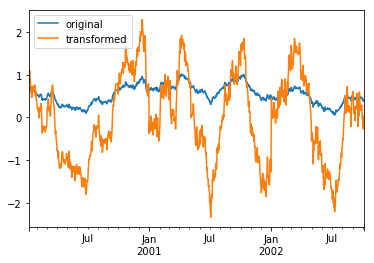

In [98]:
compare = pd.DataFrame({'original':ts,'transformed':transformed})
compare.plot()

In [99]:
data_range = lambda x: x.max() - x.min()
ts.groupby(key).transform(data_range)

2000-01-08    0.870031
2000-01-09    0.870031
2000-01-10    0.870031
2000-01-11    0.870031
2000-01-12    0.870031
2000-01-13    0.870031
2000-01-14    0.870031
2000-01-15    0.870031
2000-01-16    0.870031
2000-01-17    0.870031
2000-01-18    0.870031
2000-01-19    0.870031
2000-01-20    0.870031
2000-01-21    0.870031
2000-01-22    0.870031
2000-01-23    0.870031
2000-01-24    0.870031
2000-01-25    0.870031
2000-01-26    0.870031
2000-01-27    0.870031
2000-01-28    0.870031
2000-01-29    0.870031
2000-01-30    0.870031
2000-01-31    0.870031
2000-02-01    0.870031
2000-02-02    0.870031
2000-02-03    0.870031
2000-02-04    0.870031
2000-02-05    0.870031
2000-02-06    0.870031
                ...   
2002-09-05    0.679443
2002-09-06    0.679443
2002-09-07    0.679443
2002-09-08    0.679443
2002-09-09    0.679443
2002-09-10    0.679443
2002-09-11    0.679443
2002-09-12    0.679443
2002-09-13    0.679443
2002-09-14    0.679443
2002-09-15    0.679443
2002-09-16    0.679443
2002-09-17 

In [100]:
ts.groupby(key).transform('max') - ts.groupby(key).transform('min')
#也可以使用函数名串

2000-01-08    0.870031
2000-01-09    0.870031
2000-01-10    0.870031
2000-01-11    0.870031
2000-01-12    0.870031
2000-01-13    0.870031
2000-01-14    0.870031
2000-01-15    0.870031
2000-01-16    0.870031
2000-01-17    0.870031
2000-01-18    0.870031
2000-01-19    0.870031
2000-01-20    0.870031
2000-01-21    0.870031
2000-01-22    0.870031
2000-01-23    0.870031
2000-01-24    0.870031
2000-01-25    0.870031
2000-01-26    0.870031
2000-01-27    0.870031
2000-01-28    0.870031
2000-01-29    0.870031
2000-01-30    0.870031
2000-01-31    0.870031
2000-02-01    0.870031
2000-02-02    0.870031
2000-02-03    0.870031
2000-02-04    0.870031
2000-02-05    0.870031
2000-02-06    0.870031
                ...   
2002-09-05    0.679443
2002-09-06    0.679443
2002-09-07    0.679443
2002-09-08    0.679443
2002-09-09    0.679443
2002-09-10    0.679443
2002-09-11    0.679443
2002-09-12    0.679443
2002-09-13    0.679443
2002-09-14    0.679443
2002-09-15    0.679443
2002-09-16    0.679443
2002-09-17 

In [101]:
data_df

NameError: name 'data_df' is not defined

In [102]:
df_re = pd.DataFrame({'A':[1]*10+[5]*10,
                      'B':np.arange(20)})
df_re

,A,B
0,1,0
1,1,1
2,1,2
3,1,3
4,1,4
5,1,5
6,1,6
7,1,7
8,1,8
9,1,9
